# Investigating the dependence of the acceleration of calculating the integral on the number of processes

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

The measurements are provided by running `compute-integral` executable on the MPI cluster

In [7]:
results_path = "result.csv"

data = pd.read_csv(results_path)
print(data)

        parts  proc     accel
0        1000     1  0.621213
1        1000     2  0.517842
2        1000     3  0.574195
3        1000     4  0.275596
4        1000     5  0.190965
5        1000     6  0.229342
6        1000     7  0.229679
7        1000     8  0.194867
8     1000000     1  1.000140
9     1000000     2  1.997960
10    1000000     3  3.017750
11    1000000     4  3.916480
12    1000000     5  4.896970
13    1000000     6  5.517270
14    1000000     7  6.360350
15    1000000     8  6.809650
16  100000000     1  0.998431
17  100000000     2  1.999410
18  100000000     3  3.011550
19  100000000     4  4.001200
20  100000000     5  4.940660
21  100000000     6  5.642050
22  100000000     7  5.806090
23  100000000     8  7.283270


Text(0.5, 0, 'number of MPI processes')

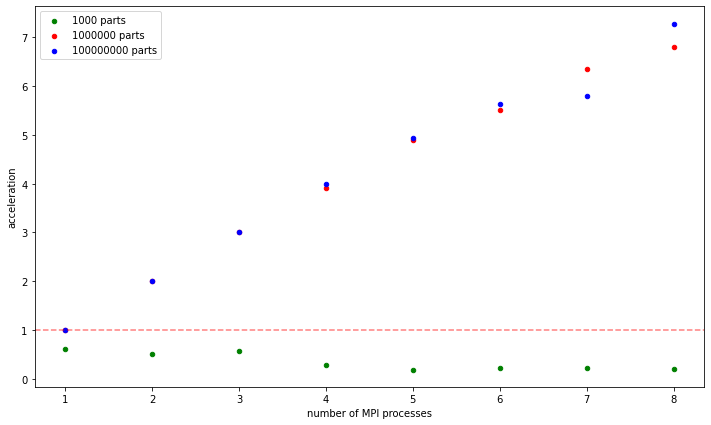

In [8]:
def plot_slice(data, n_parts, ax, color):
    data_slice = data.loc[data['parts'] == n_parts]
    data_slice.plot.scatter(x = 'proc', y = 'accel', color=color, label="{} parts".format(n_parts), ax=ax)
     
fig, ax = plt.subplots(figsize=(12, 7))

plot_slice(data, 1000, ax, 'g')
plot_slice(data, 1000000, ax, 'r')
plot_slice(data, 100000000, ax, 'b')

plt.axhline(y=1, color='r', alpha=0.5, linestyle='--')

ax.set_ylabel('acceleration')
ax.set_xlabel('number of MPI processes')

__Conclusion:__ As we can see, when number of parts in partition is small enough, the acceleration is below 1, so using MPI on small computational tasks is not reasonable. However, when number of parts is more than $1000000$, using MPI gives an acceleration multiple of the number of processes.

In [9]:
fig.savefig("report.png")